In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import BaggingClassifier
import pickle
import xgboost as xgb

/workspace/conda/envs/ds/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
with open('output/2/train.pickle', 'rb') as f:
    train = pickle.load(f)

In [3]:
print(train.data.shape, train.target.shape, train.target.mean())

(10444, 146) (10444,) 0.5


In [4]:
tuner = RandomizedSearchCV(xgb.XGBClassifier(n_estimators=100), {
    'max_depth': [2, 3, 4, 5],
    'gamma': [0, 1, 2, 3],
    'min_child_weight': [0, 1, 2, 3],
    'subsample': [0.75, 1.0],
    'colsample_bytree': [0.75, 1.0],
    'colsample_bylevel': [0.75, 1.0],
}, scoring='roc_auc', n_iter=30, refit=False, verbose=5)
tuner.fit(train.data, train.target)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] min_child_weight=3, colsample_bylevel=0.75, subsample=1.0, max_depth=4, colsample_bytree=1.0, gamma=0 
[CV]  min_child_weight=3, colsample_bylevel=0.75, subsample=1.0, max_depth=4, colsample_bytree=1.0, gamma=0, score=0.736721, total=   1.7s
[CV] min_child_weight=3, colsample_bylevel=0.75, subsample=1.0, max_depth=4, colsample_bytree=1.0, gamma=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  min_child_weight=3, colsample_bylevel=0.75, subsample=1.0, max_depth=4, colsample_bytree=1.0, gamma=0, score=0.715502, total=   1.7s
[CV] min_child_weight=3, colsample_bylevel=0.75, subsample=1.0, max_depth=4, colsample_bytree=1.0, gamma=0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV]  min_child_weight=3, colsample_bylevel=0.75, subsample=1.0, max_depth=4, colsample_bytree=1.0, gamma=0, score=0.725250, total=   1.7s
[CV] min_child_weight=1, colsample_bylevel=0.75, subsample=0.75, max_depth=3, colsample_bytree=0.75, gamma=0 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.3s remaining:    0.0s


[CV]  min_child_weight=1, colsample_bylevel=0.75, subsample=0.75, max_depth=3, colsample_bytree=0.75, gamma=0, score=0.732489, total=   1.2s
[CV] min_child_weight=1, colsample_bylevel=0.75, subsample=0.75, max_depth=3, colsample_bytree=0.75, gamma=0 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.5s remaining:    0.0s


[CV]  min_child_weight=1, colsample_bylevel=0.75, subsample=0.75, max_depth=3, colsample_bytree=0.75, gamma=0, score=0.713349, total=   1.2s
[CV] min_child_weight=1, colsample_bylevel=0.75, subsample=0.75, max_depth=3, colsample_bytree=0.75, gamma=0 
[CV]  min_child_weight=1, colsample_bylevel=0.75, subsample=0.75, max_depth=3, colsample_bytree=0.75, gamma=0, score=0.721963, total=   1.2s
[CV] min_child_weight=1, colsample_bylevel=1.0, subsample=1.0, max_depth=2, colsample_bytree=0.75, gamma=3 
[CV]  min_child_weight=1, colsample_bylevel=1.0, subsample=1.0, max_depth=2, colsample_bytree=0.75, gamma=3, score=0.720992, total=   0.9s
[CV] min_child_weight=1, colsample_bylevel=1.0, subsample=1.0, max_depth=2, colsample_bytree=0.75, gamma=3 
[CV]  min_child_weight=1, colsample_bylevel=1.0, subsample=1.0, max_depth=2, colsample_bytree=0.75, gamma=3, score=0.708031, total=   1.0s
[CV] min_child_weight=1, colsample_bylevel=1.0, subsample=1.0, max_depth=2, colsample_bytree=0.75, gamma=3 
[CV]  

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  2.6min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params={}, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'min_child_weight': [0, 1, 2, 3], 'colsample_bylevel': [0.75, 1.0], 'subsample': [0.75, 1.0], 'max_depth': [2, 3, 4, 5], 'colsample_bytree': [0.75, 1.0], 'gamma': [0, 1, 2, 3]},
          pre_dispatch='2*n_jobs', random_state=None, refit=False,
          return_train_score=True, scoring='roc_auc', verbose=5)

In [5]:
tuner.best_score_, tuner.best_params_

(0.72843676353244347,
 {'colsample_bylevel': 0.75,
  'colsample_bytree': 1.0,
  'gamma': 0,
  'max_depth': 5,
  'min_child_weight': 0,
  'subsample': 0.75})

In [6]:
model = BaggingClassifier(xgb.XGBClassifier(**tuner.best_params_), max_samples=0.75, max_features=0.75, oob_score=True)
X_train, X_val, y_train, y_val = train_test_split(train.data, train.target, test_size=1000)
model.fit(X_train, y_train)

/workspace/conda/envs/ds/lib/python3.5/site-packages/sklearn/ensemble/bagging.py:603: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/workspace/conda/envs/ds/lib/python3.5/site-packages/sklearn/ensemble/bagging.py:608: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=XGBClassifier(base_score=0.5, colsample_bylevel=0.75, colsample_bytree=1.0,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=0, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.75),
         bootstrap=True, bootstrap_features=False, max_features=0.75,
         max_samples=0.75, n_estimators=10, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

training accuracy: 0.776
             precision    recall  f1-score   support

          0       0.78      0.76      0.77      4719
          1       0.77      0.79      0.78      4725

avg / total       0.78      0.78      0.78      9444



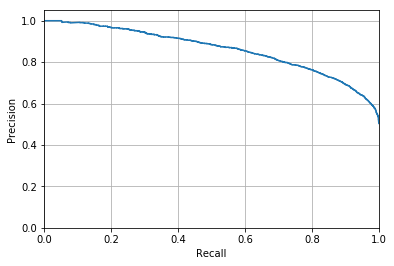

validation accuracy: 0.703
             precision    recall  f1-score   support

          0       0.71      0.69      0.70       503
          1       0.69      0.72      0.71       497

avg / total       0.70      0.70      0.70      1000



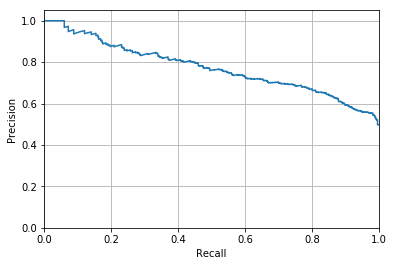

In [8]:
def plot_precision_recall(y_true, y_probas):
    precision, recall, thresholds = precision_recall_curve(y_true, y_probas[:, 1])
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.grid()

def report(name, y_true, y_probas):
    y_pred = np.argmax(y_probas, axis=1)
    print('{} accuracy: {:.3f}'.format(name, accuracy_score(y_true, y_pred)))
    print(classification_report(y_true, y_pred))
    plot_precision_recall(y_true, y_probas)
    plt.show()

report('training', y_train, model.predict_proba(X_train))
report('validation', y_val, model.predict_proba(X_val))

# Simple neural network

In [12]:
from sklearn.neural_network import MLPClassifier

nn = BaggingClassifier(MLPClassifier(
    hidden_layer_sizes=[300, 200, 100, 50, 50],
    learning_rate='adaptive',
    validation_fraction=0.2,
    verbose=True,
), max_samples=0.75, max_features=0.75, oob_score=True)
nn.fit(train.data, train.target)
nn.oob_score_

Iteration 1, loss = 6.14275035
Iteration 2, loss = 4.51645673
Iteration 3, loss = 3.22150778
Iteration 4, loss = 1.67127730
Iteration 5, loss = 1.35687045
Iteration 6, loss = 1.40833990
Iteration 7, loss = 1.16777685
Iteration 8, loss = 1.05689542
Iteration 9, loss = 1.04680481
Iteration 10, loss = 1.03594056
Iteration 11, loss = 0.98409688
Iteration 12, loss = 1.34993495
Iteration 13, loss = 0.88825858
Iteration 14, loss = 0.82600806
Iteration 15, loss = 0.85855751
Iteration 16, loss = 0.82438631
Iteration 17, loss = 0.70401318
Iteration 18, loss = 0.81693411
Iteration 19, loss = 0.74187993
Iteration 20, loss = 0.79258899
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 5.16112136
Iteration 2, loss = 1.67471272
Iteration 3, loss = 1.57738011
Iteration 4, loss = 1.13618435
Iteration 5, loss = 1.03699140
Iteration 6, loss = 0.84972203
Iteration 7, loss = 1.01530729
Iteration 8, loss = 0.97839414
Iteration 9, loss = 0.89737728

/workspace/conda/envs/ds/lib/python3.5/site-packages/sklearn/ensemble/bagging.py:603: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/workspace/conda/envs/ds/lib/python3.5/site-packages/sklearn/ensemble/bagging.py:608: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


0.59115281501340478

train accuracy: 0.623
             precision    recall  f1-score   support

          0       0.67      0.49      0.57      5222
          1       0.60      0.75      0.67      5222

avg / total       0.63      0.62      0.62     10444



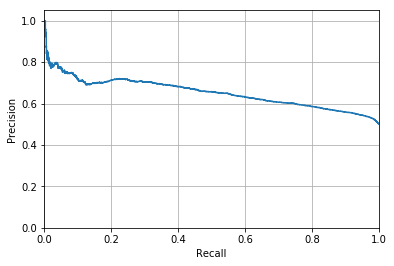

In [13]:
report('train', train.target, nn.predict_proba(train.data))

# Final model

In [17]:
model = BaggingClassifier(
    xgb.XGBClassifier(**tuner.best_params_),
    n_estimators=30, max_samples=0.75, max_features=0.75, oob_score=True)
eval_set = [(train.data, train.target)]
model.fit(train.data, train.target)
model.oob_score_

0.6726350057449253

(2000, 146) (2000,) 0.5
balanced test accuracy: 0.653
             precision    recall  f1-score   support

          0       0.65      0.65      0.65      1000
          1       0.65      0.66      0.66      1000

avg / total       0.65      0.65      0.65      2000



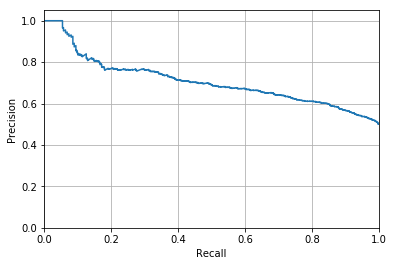

In [18]:
with open('output/2/test_balanced.pickle', 'rb') as f:
    test = pickle.load(f)
print(test.data.shape, test.target.shape, test.target.mean())
report('balanced test', test.target, model.predict_proba(test.data))

In [19]:
ratio1 = 0.0161864681127  # See the output of `train_test_split` in the previous notebook.
ratio0 = 1 - ratio1
index1 = test.target == 1
index0 = ~index1
accuracy1 = accuracy_score(test.target[index1], model.predict(test.data[index1]))
accuracy0 = accuracy_score(test.target[index0], model.predict(test.data[index0]))
print('balanced test accuracy: {:.3f}'.format(accuracy1 * 0.5 + accuracy0 * 0.5))
print('stratified test accuracy: {:.3f}'.format(accuracy1 * ratio1 + accuracy0 * ratio0))

balanced test accuracy: 0.653
stratified test accuracy: 0.647
